## Procesamiento de Imágenes Digitales

Inteligencia Artificial 2023 II <br>
Practica Calificada 2, parte práctica de la evaluación (12 puntos).


**Integrantes:**

1. Cueva Llanos, Lubeliz             20180178B
2. Flores Berrocal, Anthony Aldair   20180037J





**Nota**: Tomando como base los ejercicios desarrollados en la practica calificada 1, reponder las siguientes preguntas

## Objetivos

Los objetivos de esta práctica son:

* Desarrollar y analizar rutinas de transformaciones puntuales en el procesamiento de imágenes.
* Repasar conceptos clave en el filtrado de imágenes y programar rutinas para suavizar y resaltar bordes.

## Requerimientos

Se necesita disponer del siguiente software:
* Python 3.X
* Las siguientes librerias científicas de Python: NumPy, SciPy, y Matplotlib.
* OpenCV.

## Transformaciones puntuales




**Ejercicio 6.** Aplica el filtro de la mediana a las imágenes
``sillagauss.bmp`` y ``sillaimp.bmp``  utilizando diversos tamaños de ventana. . Muestra y discute los resultados. Compara tus resultados con los obtenidos en el Ejercicio 3 (de la pc1) o comparalos con los obtenidos utilizando el filtro gaussiano de opencv ``cv2.GaussianBlur()``


Para llevar a cabo este ejercicio, se dispondrá de varias opciones. Puedes emplear la función ``cv2.medianBlur()`` de OpenCV, la función ``scipy.ndimage.median_filter()`` de SciPy  o incluso crear una función personalizada llamada ``mediana(img, n)`` y aplicarla a la imagen con la función ``scipy.ndimage.filters()``. Esto permitirá experimentar con diferentes enfoques para la aplicación del filtro de la mediana y evaluar su eficacia en la eliminación del ruido en las imágenes."

APLICACION DEL FILTRO DE LA MEDIANA PARA COMPARAR:


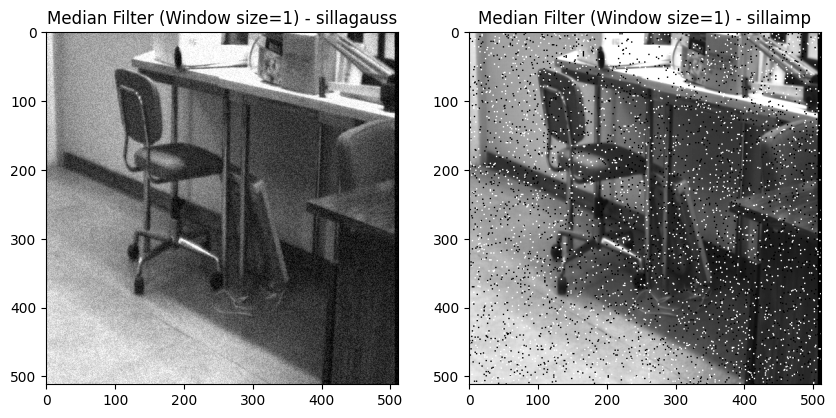

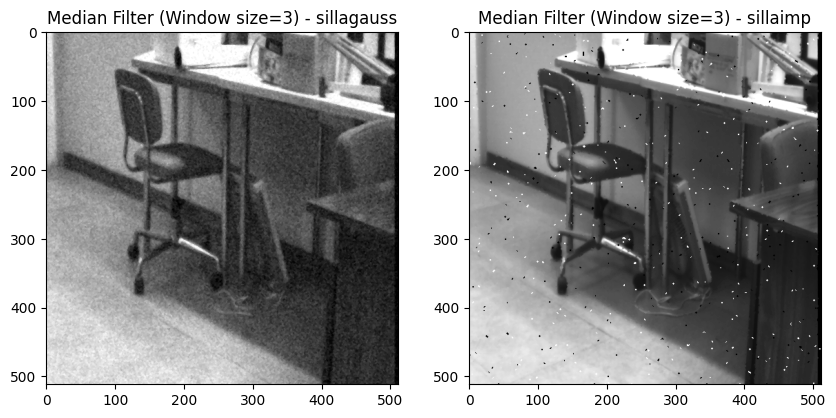

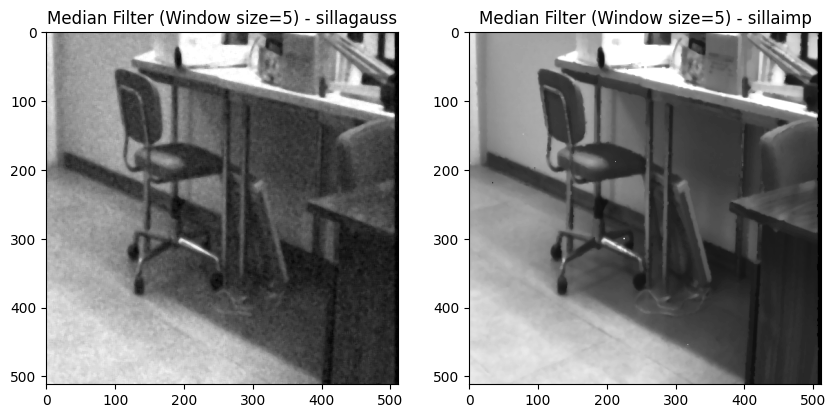

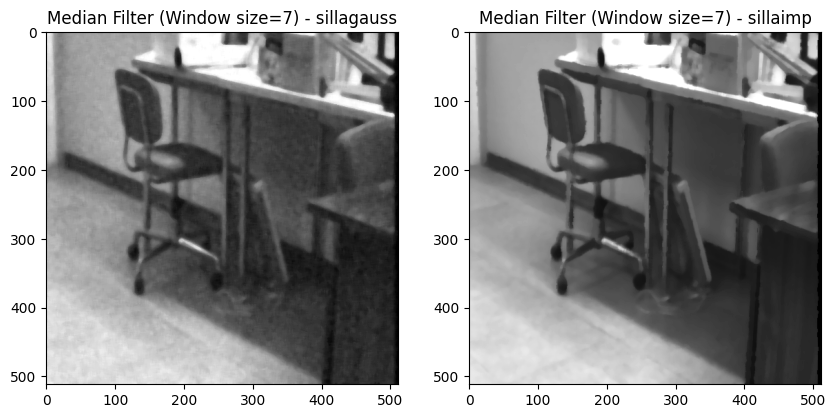

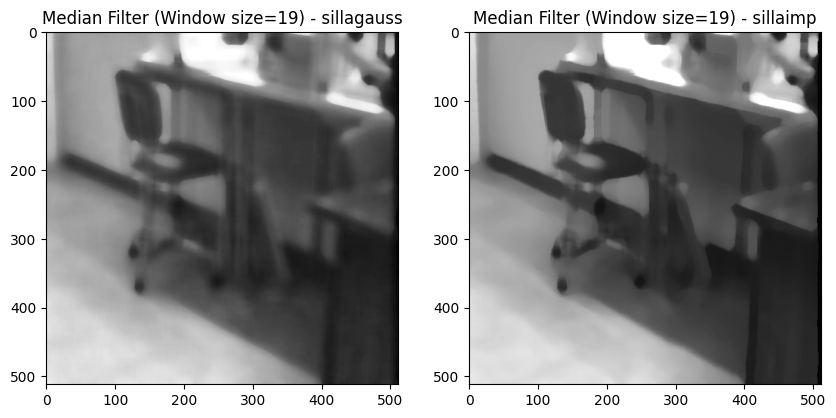

APLICACION DEL FILTRO GAUSSIANO PARA COMPARAR:


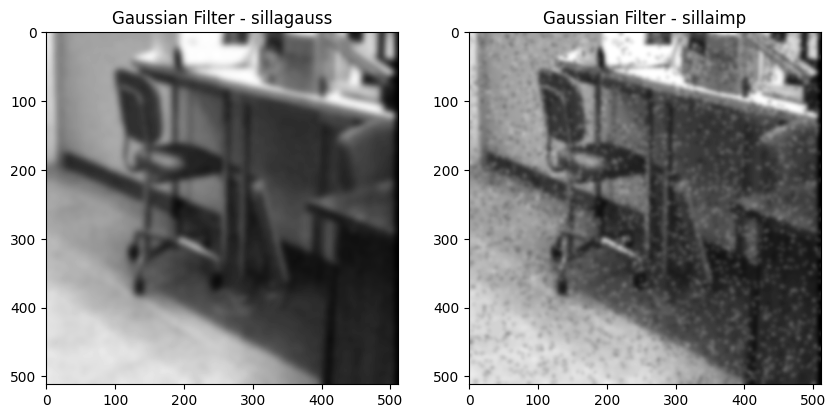

In [60]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Leer las imágenes
sillagauss = cv2.imread('imagenes/sillagauss.bmp', cv2.IMREAD_GRAYSCALE)
sillaimp = cv2.imread('imagenes/sillaimp.bmp', cv2.IMREAD_GRAYSCALE)

# Tamaños de ventana para el filtro de la mediana
window_sizes = [1, 3, 5, 7, 19]

# (1) Aplicar el filtro de la mediana con cv2.medianBlur
print("APLICACION DEL FILTRO DE LA MEDIANA PARA COMPARAR:")
for size in window_sizes:
    median_sillagauss = cv2.medianBlur(sillagauss, size)
    median_sillaimp = cv2.medianBlur(sillaimp, size)

    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.title(f'Median Filter (Window size={size}) - sillagauss')
    plt.imshow(median_sillagauss, cmap='gray')
    
    plt.subplot(1, 2, 2)
    plt.title(f'Median Filter (Window size={size}) - sillaimp')
    plt.imshow(median_sillaimp, cmap='gray')
    
    plt.show()

# (2) Aplicar el filtro gaussiano usando GaussianBlur de opencv para comparar
print("APLICACION DEL FILTRO GAUSSIANO PARA COMPARAR:")
gaussian_sillagauss = cv2.GaussianBlur(sillagauss, (27, 27), 0)
gaussian_sillaimp = cv2.GaussianBlur(sillaimp, (17, 17), 0)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Gaussian Filter - sillagauss')
plt.imshow(gaussian_sillagauss, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Gaussian Filter - sillaimp')
plt.imshow(gaussian_sillaimp, cmap='gray')

plt.show()


**Ejercicio 7.** Usa la funcion ``cv2.bilateralFilter()`` de OpenCV p para llevar a cabo el filtrado bilateral de una imagen. Selecciona cuidadosamente los parámetros apropiados y aplícalo tanto a las imágenes ``sillagauss.bmp`` y ``sillaimp.bmp``, así como a otras de tu elección.

En el contexto del filtrado bilateral,  $\sigma_r$ a la varianza de la gaussiana que controla la ponderación debida a la diferencia entre los valores de los píxeles, mientras que $\sigma_s$ a la varianza de la gaussiana que controla la ponderación debida a la posición de los píxeles. A continuación, se plantean algunas interrogantes:
* ¿¿Cuál es el comportamiento del filtro bilateral cuando la varianza $\sigma_r$ es muy elevada? ¿En este caso qué ocurre si $\sigma_s$ es alta o baja?
* ¿Cómo se comporta el filtro cuando $\sigma_r$ es muy baja? ¿En este caso cómo se comporta el filtro dependiendo si $\sigma_s$ es alta o baja?

Se espera que se muestren y discutan los resultados obtenidos al variar los valores de los parámetros y al aplicar el filtro sucesivamente en múltiples ocasiones. Compáralos con los obtenidos en los Ejercicios 3 (de la pc1) y 6 (de esta pc) para evaluar su efectividad en la mejora de la calidad de las imágenes.

IMAGEN ORIGINAL sillaimp.bpm


(-0.5, 511.5, 511.5, -0.5)

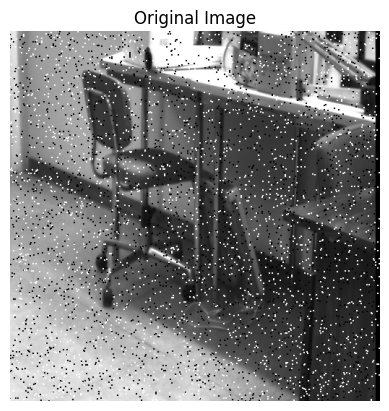

In [197]:
import cv2
import matplotlib.pyplot as plt

def apply_bilateral_filter(image_path, sigma_r, sigma_space):
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

## bilateralFilter()
# src       	Source 8-bit or floating-point, 1-channel or 3-channel image.
# dst       	Destination image of the same size and type as src .
# d     	    Diameter of each pixel neighborhood that is used during filtering. If it is non-positive, it is computed from sigmaSpace.
# sigmaColor    Filter sigma in the color space. A larger value of the parameter means that farther colors within the pixel neighborhood (see sigmaSpace) will be mixed together, resulting in larger areas of semi-equal color.
# sigmaSpace    Filter sigma in the coordinate space. A larger value of the parameter means that farther pixels will influence each other as long as their colors are close enough (see sigmaColor ). When d>0, it specifies the neighborhood size regardless of sigmaSpace. Otherwise, d is proportional to sigmaSpace.
# borderType    border mode used to extrapolate pixels outside of the image, see BorderTypes
    filtered_image = cv2.bilateralFilter(image, d=19, sigmaColor=sigma_r, sigmaSpace=sigma_space)

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(image)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title(f'Filtered Image\nSigma Color: {sigma_r}, Sigma Space: {sigma_space}')
    plt.imshow(filtered_image)
    plt.axis('off')

    plt.show()

print("IMAGEN ORIGINAL sillaimp.bpm")
#image_path = "imagenes/sillagauss.bmp"
image_path = "imagenes/sillaimp.bmp"
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#plt.subplot(2, 4, 2)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

1. SIGMA R ELEVADO
1.1 Sigma S elevado
Comentarios: Cuando ambos (σ_s y σ_r) son grandes, la imagen se ve muy suavizada, con bordes y detalles menos definidos.
El ruido se reduce significativamente, pero la imagen pierde detalles. Es decir, el suavisado es general y no se aprecia adecuadamente la image.


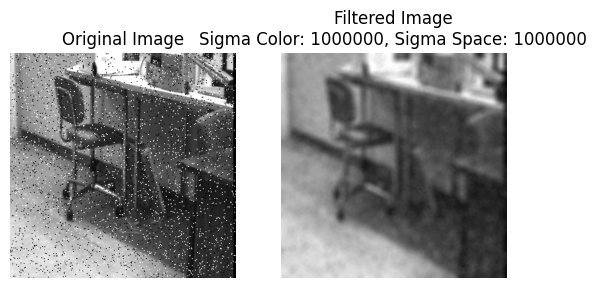

In [196]:
print("1. SIGMA R ELEVADO")
print("1.1 Sigma S elevado")
print("Comentarios: Cuando ambos (σ_s y σ_r) son grandes, la imagen se ve muy suavizada, con bordes y detalles menos definidos.")
print("El ruido se reduce significativamente, pero la imagen pierde detalles. Es decir, el suavisado es general y no se aprecia adecuadamente la image.")
apply_bilateral_filter(image_path, sigma_r=1000000, sigma_space=1000000)

Sigma r elevado y Sigma S bajo:
Comentarios: Cuando σ_s es pequeño y σ_r es alto), la imagen se ve más nítida en general, con el ruido reducido de manera
efectiva pero sin perder muchos detallles. En comparación con la imagen anterior, aquí se aprecia mejor los detalles de la imagen.
Del evento se destaca que estamos ante un caso de reducción de ruido sutil.


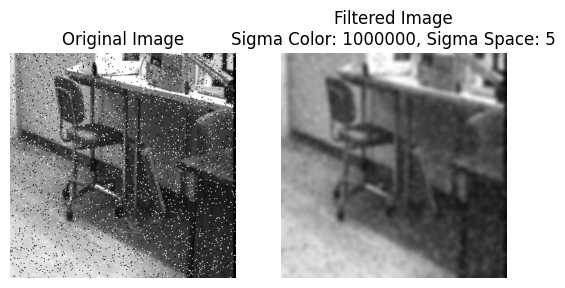

In [192]:
print("Sigma r elevado y Sigma S bajo:")
print("Comentarios: Cuando σ_s es pequeño y σ_r es alto), la imagen se ve más nítida en general, con el ruido reducido de manera")
print("efectiva pero sin perder muchos detallles. En comparación con la imagen anterior, aquí se aprecia mejor los detalles de la imagen.")
print("Del evento se destaca que estamos ante un caso de reducción de ruido sutil.")
apply_bilateral_filter(image_path, sigma_r=1000000, sigma_space=5)

2. SIGMA R BAJO
2.1 Sigma S elevado
Comentarios: Con σ_s grande y σ_r pequeño, la imagen mantiene sus bordes nítidos y detalles, pero el ruido se reducirá en menor medida. Es decir, se tiene una preservación de bordes.


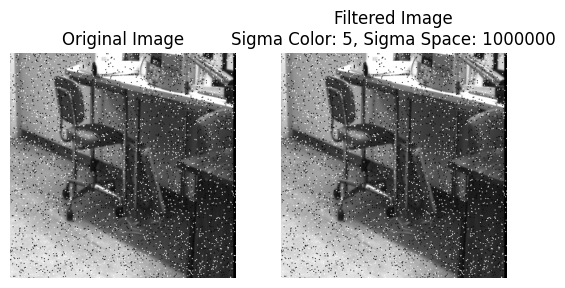

In [193]:
print("2. SIGMA R BAJO")
print("2.1 Sigma S elevado")
print("Comentarios: Con σ_s grande y σ_r pequeño, la imagen mantiene sus bordes nítidos y detalles, pero el ruido se reducirá en menor medida. Es decir, se tiene una preservación de bordes.")
apply_bilateral_filter(image_path, sigma_r=5, sigma_space=1000000)

2.2 Sigma S bajo
Comentarios: Cuando ambos sigma son pequeños, las variaciones no son notables.


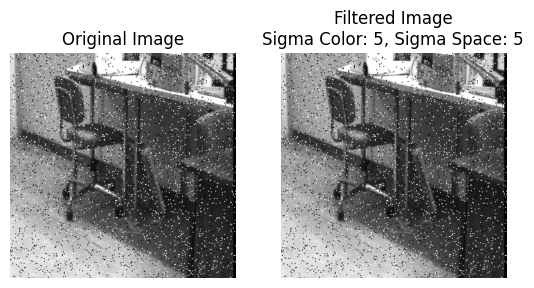

In [194]:
print("2.2 Sigma S bajo")
print("Comentarios: Cuando ambos sigma son pequeños, las variaciones no son notables.")
apply_bilateral_filter(image_path, sigma_r=5, sigma_space=5)

## Transformada Hough

**Ejercicio 8.** Emplea la transformada Hough para encontrar segmentos rectilíneos en la imagen ``pasillo.jpg``. Para extraer los bordes de la imagen puedes utilizar las funciones escritas en los ejercicios 3 y 4 (de la pc1) o usar algunas de las funciones que tiene opencv para extraer bordes (por ejemplo ``cv2.Canny``. Si usas esta función de openCV como ``cv2.Canny`` explica por qué pusiste los  valores de los parámetros que empleaste.) Utiliza la función ``cv2.HoughLinesP()`` de OpenCV.

Es fundamental realizar un análisis exhaustivo del rendimiento del algoritmo para diferentes valores de los parámetros de la función de transformada de Hough, así como para evaluar los efectos de los filtros utilizados en la extracción de bordes. Discute estos resultados. Pinta los resultados sobre la imagen (puedes guiarte como ejemplo de lo mostrado en, https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_houghlines/py_houghlines.html).
